# TP - Parte 1
## Análisis de datos sobre dataset ["Crímenes reportados en Chicago", año 2024](https://data.cityofchicago.org/Public-Safety/Crimes-2024/dqcy-ctma/about_data) 

### Consignas
El análisis debe abordar los siguientes aspectos:
 * Planteo de al menos tres preguntas a ser respondidas mediante análisis de datos.
    * Se pueden usar como ejemplo las preguntas sugeridas, o proponer otras.
 * Exploración y comprensión de los datos:
    * Cargar el dataset proporcionado y realizar un análisis exploratorio de los datos.
    * Describir las características principales del dataset, incluyendo el número de observaciones, número de variables y tipos de datos.
    * Identificar patrones generales, distribuciones y cualquier anomalía inicial en los datos.
    * Visualizar las variables más importantes para entender sus relaciones y distribuciones.
 * Aplicación de técnicas de visualización:
    * Utilizar técnicas de visualización adecuadas para ilustrar las principales características del dataset.
    * Asegurarse de que las visualizaciones sean claras, concisas y efectivas para comunicar la información.
    * Interpretar los resultados obtenidos a partir de las visualizaciones.
 * Limpieza del dataset:
    * Identificar y tratar los valores faltantes en el dataset.
    * Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.

### Preguntas sugeridas según el dataset elegido
 1. ¿Cómo varía la distribución de los crímenes a lo largo de las horas del día, los días de la semana y los meses del año?
 2. ¿Se observan anomalías y/o patrones estacionales?
 3. ¿Hay diferencias significativas entre el número de crímenes en distintos distritos o comunas?
 4. ¿Están las fuerzas policiales bien distribuidas en relación a las características de cada zona? (ej: la mayor cantidad de actividad policial/arrestos se registra en las zonas críticas)
 5. ¿Cómo variaron los crímenes en la ciudad después de algún cambio o evento social importante? (ej: Covid-19, protestas, etc.)


#### Integrantes:
* Mealla Pablo
* Viñas Gustavo

Descripción de columnas según información provista en el origen del dataset

| Nombre columna | Descripción | Tipo de dato |
| --- | --- | --- |
|	ID	|	Unique identifier for the record.	|	Number	|
|	Case Number	|	The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.	|	Text	|
|	Date	|	Date when the incident occurred. this is sometimes a best estimate.	|	Floating Timestamp	|
|	Block	|	The partially redacted address where the incident occurred, placing it on the same block as the actual address.	|	Text	|
|	IUCR	|	The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.	|	Text	|
|	Primary Type	|	The primary description of the IUCR code.	|	Text	|
|	Description	|	The secondary description of the IUCR code, a subcategory of the primary description.	|	Text	|
|	Location Description	|	Description of the location where the incident occurred.	|	Text	|
|	Arrest	|	Indicates whether an arrest was made.	|	Checkbox	|
|	Domestic	|	Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.	|	Checkbox	|
|	Beat	|	Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.	|	Text	|
|	District	|	Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.	|	Text	|
|	Ward	|	The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.	|	Number	|
|	Community Area	|	Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.	|	Text	|
|	FBI Code	|	Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).See the Chicago Police Department listing of these classifications at https://gis.chicagopolice.org/pages/crime_details.	|	Text	|
|	X Coordinate	|	The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Y Coordinate	|	The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Year	|	Year the incident occurred.	|	Number	|
|	Updated On	|	Date and time the record was last updated.	|	Floating Timestamp	|
|	Latitude	|	The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Longitude	|	The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Location	|	The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Point	|



In [1]:
# Import de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

plt.style.use('ggplot')
sns.set_theme()

In [2]:
# Carga del dataset
df_csv = pd.read_csv("dataset/Crimes_-_2024_20250502.zip")

# Análisis inicial de columnas y cantidad de datos
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258082 entries, 0 to 258081
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    258082 non-null  int64  
 1   Case Number           258082 non-null  object 
 2   Date                  258082 non-null  object 
 3   Block                 258082 non-null  object 
 4   IUCR                  258082 non-null  object 
 5   Primary Type          258082 non-null  object 
 6   Description           258082 non-null  object 
 7   Location Description  257054 non-null  object 
 8   Arrest                258082 non-null  bool   
 9   Domestic              258082 non-null  bool   
 10  Beat                  258082 non-null  int64  
 11  District              258082 non-null  int64  
 12  Ward                  258082 non-null  int64  
 13  Community Area        258080 non-null  float64
 14  FBI Code              258082 non-null  object 
 15  

Nos encontramos que el dataset tiene:
   * Columnas: 22 
      * 2 bool
      * 5 float
      * 5 int
      * 10 string
   * Filas (observaciones): 258.082

En principio, vemos que hay columnas con datos nulos, se observan en el conteo de not-null previo.  
Las columnas con datos nulos son:
   * Location Description
   * Community Area
   * X Coordinate
   * Y Coordinate
   * Latitude
   * Longitude
   * Location

In [3]:
# Verificación de que el dataset solo tiene datos del año elegido

print(df_csv["Year"].unique())

[2024]


In [4]:
# Visualización de algunas líneas del dataset

with pd.option_context('display.max_columns', None):
    display(df_csv.head())

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,332,3,5,43.0,14,1186817.0,1860189.0,2024,01/08/2025 03:42:09 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,223,2,3,38.0,26,1179661.0,1873623.0,2024,01/08/2025 03:42:09 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,834,8,18,70.0,04B,1145740.0,1853048.0,2024,01/08/2025 03:42:09 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,321,3,20,42.0,14,1184362.0,1861188.0,2024,01/08/2025 03:42:09 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2531,25,29,25.0,08B,1137458.0,1907694.0,2024,01/08/2025 03:42:09 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


Las columnas "ID" y "Case Number" identifican cada crimen. La primera es respecto al dataset, la segunda es respecto a la policia de Chicago.  
La columna "Primary Type" es la categoría del crimen y, junto con "Description", agrupan el incidente ocurrido.  
La codificación de ambas proviene de la columna "IUCR", que es el código que identifica el tipo de crimen acontecido. Tambien se encuentra la columna "FBI Code", con la categoría del crimen correspondiente al FBI.  
Las columnas "Block", "X Coordinate"/"Y Coordinate", "Latitude"/"Longitude" y "Location" representan la ubicación aproximada del crimen, con diferentes formatos.  


In [5]:
duplicados = df_csv[df_csv.duplicated(keep=False)]
print(f"Casos duplicados: {len(duplicados)}")
display(duplicados)

Casos duplicados: 0


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


Resulta intersante realizar nuevamente el chequeo de duplicados, pero quitando primero algunas columnas ("ID" y "Updated On")

In [6]:
drop_columns = ["ID", "Updated On"]
df_dup = df_csv.drop(drop_columns, axis=1)

duplicados = df_csv[df_dup.duplicated(keep=False)]
print(f"Filas duplicadas: {len(duplicados)}, casos: {len(duplicados['Case Number'].unique())}")
display(duplicados)

Filas duplicadas: 16, casos: 8


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
18361,28505,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18362,28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
56220,28414,JH459847,10/07/2024 10:45:00 PM,078XX S WESTERN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,...,18,70.0,01A,1161739.0,1852605.0,2024,10/15/2024 03:41:39 PM,41.751216,-87.682880,POINT (-87.682879763 41.751216002)
56221,28415,JH459847,10/07/2024 10:45:00 PM,078XX S WESTERN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,...,18,70.0,01A,1161739.0,1852605.0,2024,10/15/2024 03:41:39 PM,41.751216,-87.682880,POINT (-87.682879763 41.751216002)
127667,28235,JH333940,07/05/2024 07:12:00 AM,036XX E 87TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,10,46.0,01A,1202185.0,1848046.0,2024,07/13/2024 03:41:12 PM,41.737771,-87.534823,POINT (-87.534822726 41.737771151)
127668,28236,JH333940,07/05/2024 07:12:00 AM,036XX E 87TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,10,46.0,01A,1202185.0,1848046.0,2024,07/13/2024 03:41:12 PM,41.737771,-87.534823,POINT (-87.534822726 41.737771151)
136988,28198,JH317789,06/23/2024 08:44:00 AM,123XX S HALSTED ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,9,53.0,01A,1173228.0,1823102.0,2024,07/01/2024 03:48:39 PM,41.670009,-87.641647,POINT (-87.641646732 41.670009388)
136989,28199,JH317789,06/23/2024 08:44:00 AM,123XX S HALSTED ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,9,53.0,01A,1173228.0,1823102.0,2024,07/01/2024 03:48:39 PM,41.670009,-87.641647,POINT (-87.641646732 41.670009388)
155757,28147,JH284448,05/30/2024 02:16:00 AM,028XX S SACRAMENTO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,25,30.0,01A,1156822.0,1885102.0,2024,06/07/2024 03:41:01 PM,41.840493,-87.700021,POINT (-87.700020957 41.840492863)
155758,28148,JH284448,05/30/2024 02:16:00 AM,028XX S SACRAMENTO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,25,30.0,01A,1156822.0,1885102.0,2024,06/07/2024 03:41:01 PM,41.840493,-87.700021,POINT (-87.700020957 41.840492863)


Tenemos 16 casos donde aparecen 2 veces exactamente igual, mismo número de caso, mismos datos de crimen.

Ahora, quitamos también la columna "Date", y vemos que sucede (observando el resultado sobre el dataset con todas las columnas)


In [7]:
drop_columns = ["ID", "Date", "Updated On"]
df_dup2 = df_csv.drop(drop_columns, axis=1)

duplicados = df_csv[df_dup2.duplicated(keep=False)]
print(f"Filas duplicadas: {len(duplicados)}, casos: {len(duplicados['Case Number'].unique())}")
display(duplicados)

Filas duplicadas: 52, casos: 24


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
12078,28521,JH539697,12/12/2024 03:40:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49.0,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
12080,28520,JH539697,12/12/2024 03:23:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49.0,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
18361,28505,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18362,28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18458,28504,JH528033,12/02/2024 02:51:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
30792,28482,JH505655,11/12/2024 10:37:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,11,34.0,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
30801,28481,JH505655,11/12/2024 10:21:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,11,34.0,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
35845,28470,JH496538,11/05/2024 02:40:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,...,42,8.0,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
35863,28469,JH496538,11/05/2024 02:03:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,...,42,8.0,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
36220,28468,JH495872,11/04/2024 09:30:00 PM,080XX S INGLESIDE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,8,44.0,01A,1183960.0,1851854.0,2024,11/12/2024 03:41:00 PM,41.748665,-87.601475,POINT (-87.601474713 41.748665338)


Tenemos ahora 52 repetidos.  
Observando algún caso particular, como el JH165644, vemos que es un registro cargado 3 veces, con IDs 27994, 27995 y 27996, con 3 fechas distintas de crimen, aunque distantes solo unos minutos entre si (todas el 25/02/2024, con horarios 07:59:00 PM, 08:10:00 PM y 08:16:00 PM).  
Hay casos donde los registros son exactamente iguales, tambien otros donde las fechas tienen algunos días de distancia.  
Podemos suponer que son registros duplicados/triplicados?  
O que se carga un registro por cada victima en los casos de multiples victimas?

Vamos a quitar las columnas "ID", "Case Number", "Updated On" para observar los duplicados tambien

In [8]:
drop_columns = ["ID", "Case Number", "Updated On"]
df_dup3 = df_csv.drop(drop_columns, axis=1)

duplicados = df_csv[df_dup3.duplicated(keep=False)]
print(f"Filas duplicadas: {len(duplicados)}")
display(duplicados)

Filas duplicadas: 826


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
282,13707497,JH561436,12/31/2024 02:30:00 PM,018XX W NEWPORT AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,47,5.0,14,1163353.0,1922932.0,2024,01/08/2025 03:42:09 PM,41.944167,-87.674990,POINT (-87.674989557 41.944166715)
284,13707532,JH561380,12/31/2024 02:30:00 PM,018XX W NEWPORT AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,47,5.0,14,1163353.0,1922932.0,2024,01/08/2025 03:42:09 PM,41.944167,-87.674990,POINT (-87.674989557 41.944166715)
3162,13815408,JJ228638,12/26/2024 09:30:00 PM,132XX S RIVERDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,10,54.0,07,1181636.0,1817783.0,2024,04/27/2025 03:40:45 PM,41.655224,-87.611038,POINT (-87.611037691 41.655223932)
3163,13815457,JJ229689,12/26/2024 09:30:00 PM,132XX S RIVERDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,10,54.0,07,1181636.0,1817783.0,2024,04/27/2025 03:40:45 PM,41.655224,-87.611038,POINT (-87.611037691 41.655223932)
3978,13702075,JH554828,12/25/2024 08:59:00 AM,009XX W DAKIN ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,46,6.0,14,1169342.0,1926419.0,2024,01/02/2025 03:41:34 PM,41.953607,-87.652875,POINT (-87.652875013 41.953606846)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257192,13327536,JH102991,01/01/2024 08:56:00 PM,020XX N AUSTIN AVE,0610,BURGLARY,FORCIBLE ENTRY,COMMERCIAL / BUSINESS OFFICE,False,False,...,29,19.0,05,1136075.0,1912924.0,2024,12/21/2024 03:40:46 PM,41.917235,-87.775492,POINT (-87.775491899 41.917234781)
257953,13326167,JH101437,01/01/2024 12:00:00 AM,040XX S DREXEL BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,4,36.0,14,1182780.0,1878176.0,2024,12/21/2024 03:40:46 PM,41.820923,-87.604982,POINT (-87.604981565 41.820922725)
257982,13326068,JH101415,01/01/2024 12:00:00 AM,040XX S DREXEL BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,4,36.0,14,1182780.0,1878176.0,2024,12/21/2024 03:40:46 PM,41.820923,-87.604982,POINT (-87.604981565 41.820922725)
257989,13641101,JH460468,01/01/2024 12:00:00 AM,116XX S WATKINS AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,...,21,75.0,02,1166059.0,1827515.0,2024,12/21/2024 03:40:46 PM,41.682274,-87.667760,POINT (-87.667759805 41.682274355)


Tenemos ahora 826 filas con registros duplicados, pero en esta observación, distintos números de caso.  
Es decir, son crimenes ocurridos el mismo día, misma hora, mismo lugar, mismas características, pero cargados como casos distintos.  
Nuevamente podríamos preguntarnos, se carga un número de caso por cada victima en los casos de multiples victimas?  
Se registró el caso dos veces error? por fallos en el sistema al momento de la carga?   

Para nuestro análisis, vamos a considerar duplicados aquellos registros con mismo número de caso, sin importar la fecha, por lo tanto, nos quedaremos solo con el último.

Para continuar, también crearemos nuevas columnas a partir de datos existentes, que nos servirán para analizar otros aspectos de los casos, y eliminaremos columnas que consideramos innecesarias.

In [9]:
# Eliminamos los duplicados obtenidos en df_dup2
df_csv.drop_duplicates(df_dup2.columns, keep='last', inplace=True)

# Convertimos la columna Date a datetime para luego agregar columnas con información sobre características de la fecha
df_csv["Date"] = pd.to_datetime(df_csv.Date, format="%m/%d/%Y %I:%M:%S %p")

# Agregamos al dataset información sobre la hora del crimen, el día de la semana y el mes del año en que ocurrieron
df_csv["Hour"] = df_csv.Date.dt.hour
df_csv["Day Of Week"] = df_csv.Date.dt.dayofweek
df_csv["Day"] = df_csv.Date.dt.day
df_csv["Month"] = df_csv.Date.dt.month

# Eliminamos columnas que consideramos no tienen aporte significativo, o que tiene valores únicos para cada fila
drop_columns = ["ID", "Case Number", "Block", "X Coordinate", "Y Coordinate", "Year", "Updated On", "Location"]
df_csv.drop(drop_columns, inplace=True, axis=1)

In [10]:
df_csv.describe()

,Date,Beat,District,Ward,Community Area,Latitude,Longitude,Hour,Day Of Week,Day,Month
count,258054,258054.000000,258054.000000,258054.000000,258052.000000,257830.000000,257830.000000,258054.000000,258054.000000,258054.000000,258054.000000
mean,2024-07-02 15:08:49.497384192,1157.127679,11.341378,23.187441,36.180417,41.847530,-87.668952,12.509188,2.993203,15.636378,6.537496
min,2024-01-01 00:00:00,111.000000,1.000000,1.000000,1.000000,41.644590,-87.934567,0.000000,0.000000,1.000000,1.000000
25%,2024-04-07 12:00:00,533.000000,5.000000,10.000000,22.000000,41.772692,-87.709922,8.000000,1.000000,8.000000,4.000000
50%,2024-07-03 17:07:00,1034.000000,10.000000,23.000000,32.000000,41.866093,-87.661861,13.000000,3.000000,16.000000,7.000000
75%,2024-09-26 22:30:00,1732.000000,17.000000,34.000000,53.000000,41.910074,-87.627356,18.000000,5.000000,23.000000,9.000000
max,2024-12-31 23:58:00,2535.000000,31.000000,50.000000,77.000000,42.022548,-87.524531,23.000000,6.000000,31.000000,12.000000
std,NaN,709.307100,7.087706,13.948324,21.605304,0.086724,0.058844,6.851880,2.007747,8.887066,3.350021


In [11]:
# Valores faltantes

print(f"Valores faltantes:\n{df_csv.isnull().sum()}")


Valores faltantes:
Date                       0
IUCR                       0
Primary Type               0
Description                0
Location Description    1028
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             2
FBI Code                   0
Latitude                 224
Longitude                224
Hour                       0
Day Of Week                0
Day                        0
Month                      0
dtype: int64


Se observa que el atributo "Location Description" tiene valores faltantes, este atributo nos da una descripcion de donde ocurrió el crimen.

Tambien se observa que hay valores faltantes para latitud/logitud.

Esto es similar al análisis de columnas previo, solo que aqui contamos los nulos en lugar de los no nulos, y lo hacemos luego de quitar columnas irrelevantes y duplicados.

Vamos a observar los datos mediante gráficas

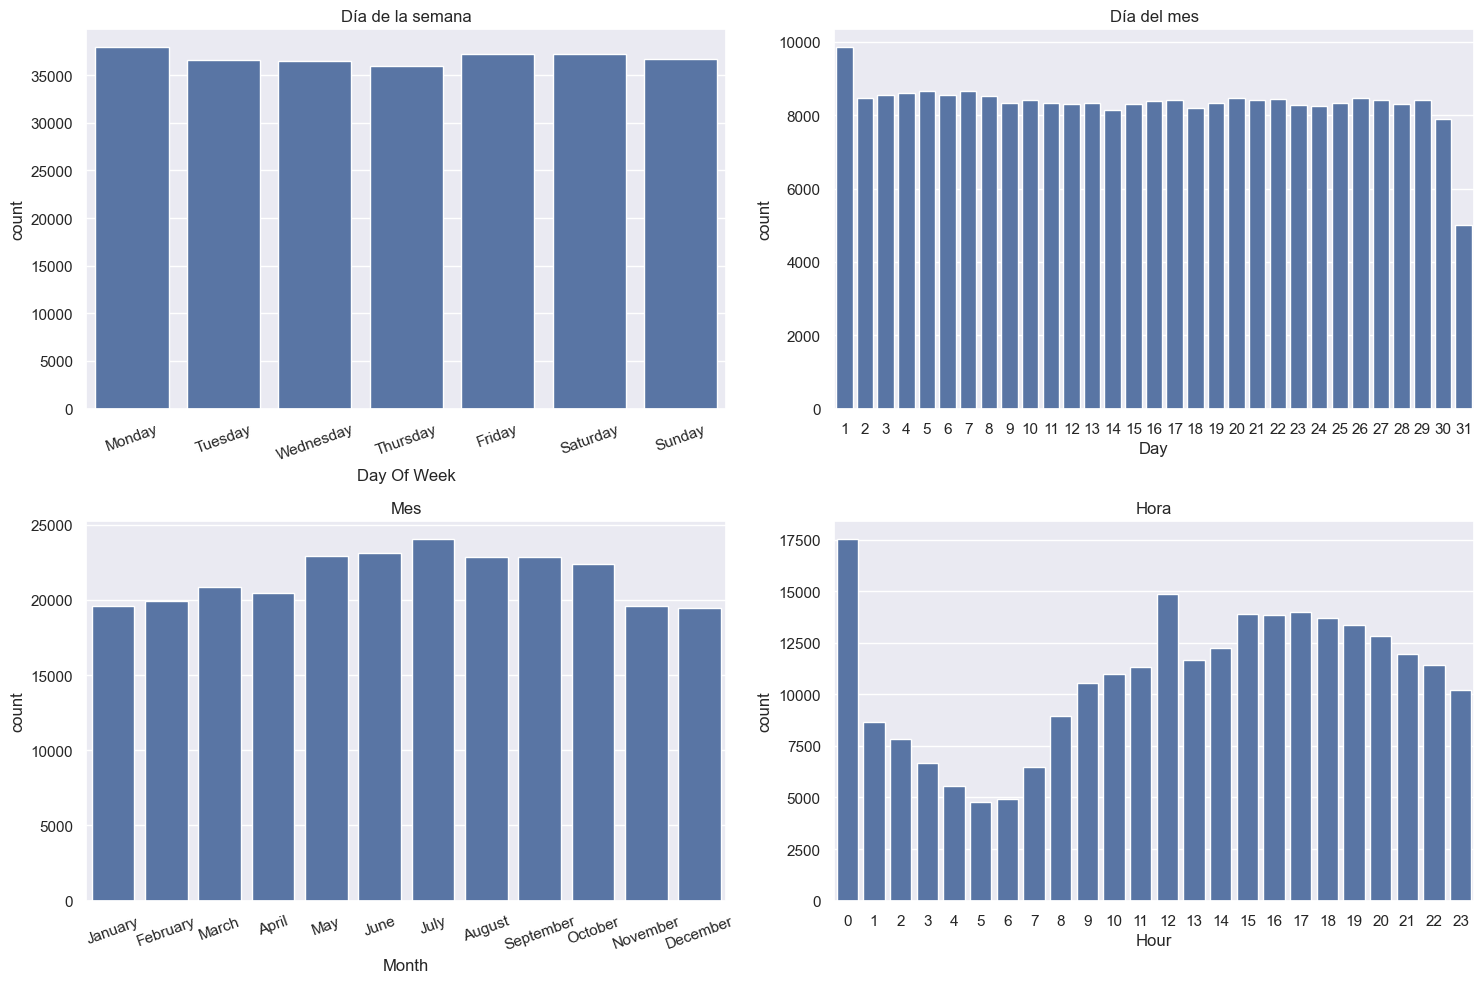

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
# día de la semana
sns.countplot(data=df_csv, x='Day Of Week', ax=ax[0,0])
ax[0,0].set_xticks(range(0,7), calendar.day_name[0:7], rotation=20)
ax[0,0].set_title('Día de la semana')
# día del mes
sns.countplot(data=df_csv, x='Day', ax=ax[0,1])
ax[0,1].set_title('Día del mes')
# mes
sns.countplot(data=df_csv, x='Month', ax=ax[1,0])
ax[1,0].set_xticks(range(0,12), calendar.month_name[1:13], rotation=20)
ax[1,0].set_title('Mes')
# hora
sns.countplot(data=df_csv, x='Hour', ax=ax[1,1])
ax[1,1].set_xticks(range(0,24), range(0,24))
ax[1,1].set_title('Hora')

plt.tight_layout()
plt.show()

De los gráficos se observa que julio es el mes con mas crímenes (verano en Chicago), mientras que diciembre es el mes con menos crímenes (invierno en Chicago).  
Según los días de la semana, no se observa una tendencia marcada sobre algún día particular.  
En cuanto a las horas, se ven 2 picos que llaman la atención, a las 0 y 12 horas. Debemos realizar un análisis sobre estos casos. Tambien se ve que hay menos crímenes entre las 5 y 6 horas, y más crímenes entre las 15 y las 18 horas. (Mas crímenes durante la tarde, menos durante la madrugada)

Convertimos las columnas categoricas, para realizar un análisis mas detallado sobre ellas

In [13]:
# Convertimos columnas del dataset al tipo correcto
df_csv['IUCR'] = df_csv['IUCR'].astype('category')
df_csv['Primary Type'] = df_csv['Primary Type'].astype('category')
df_csv['Description'] = df_csv['Description'].astype('category')
df_csv['Location Description'] = df_csv['Location Description'].astype('category')
df_csv['Beat'] = df_csv['Beat'].astype('category')
df_csv['District'] = df_csv['District'].astype('category')
df_csv['Ward'] = df_csv['Ward'].astype('category')
df_csv['Community Area'] = df_csv['Community Area'].astype('category')
df_csv['FBI Code'] = df_csv['FBI Code'].astype('category')


In [14]:
df_csv.describe(include='category')

,IUCR,Primary Type,Description,Location Description,Beat,District,Ward,Community Area,FBI Code
count,258054,258054,258054,257026,258054,258054,258054,258052.0,258054
unique,340,31,318,128,275,23,50,77.0,26
top,0486,THEFT,SIMPLE,STREET,1834,8,27,25.0,06
freq,20377,60418,31511,69555,3087,17214,11977,12914.0,61191


De los datos del resumen previo, podemos concluir rápidamente que hay mas:
 * Crímenes clasificados con código 0486 según el IUCR (7,90%)
 * Robos (23.41%)
 * Crímenes simples (12,21%)
 * Crímenes sucedidos en la calle (27,06%)
 * Crímenes en el distrito 8 (6,67%)
 * Crímenes clasificados con código 06 según el FBI (23,71%)

Veamos algunos gráficos de estas variables

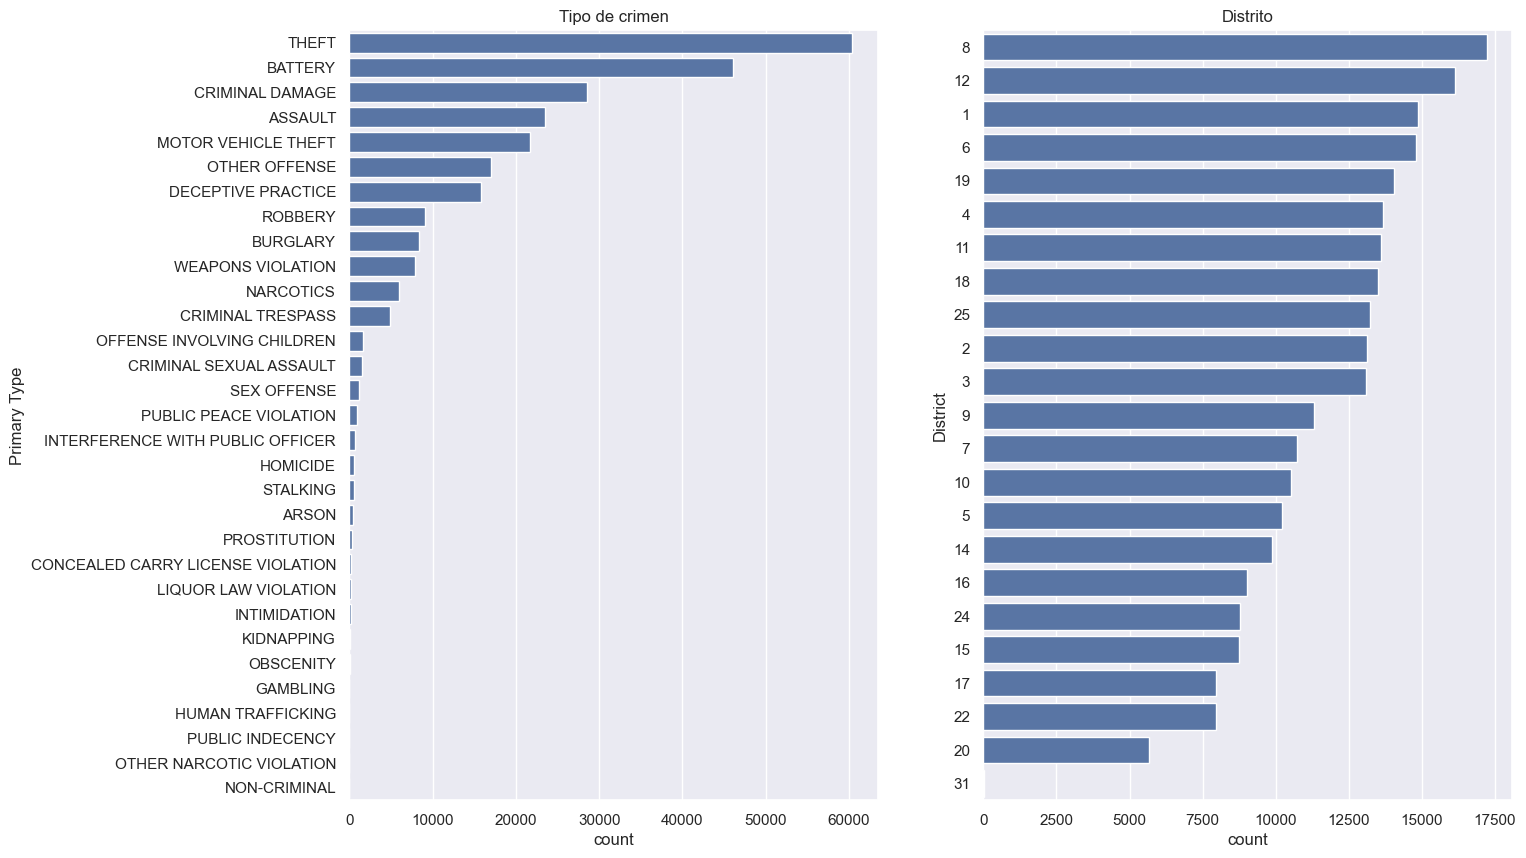

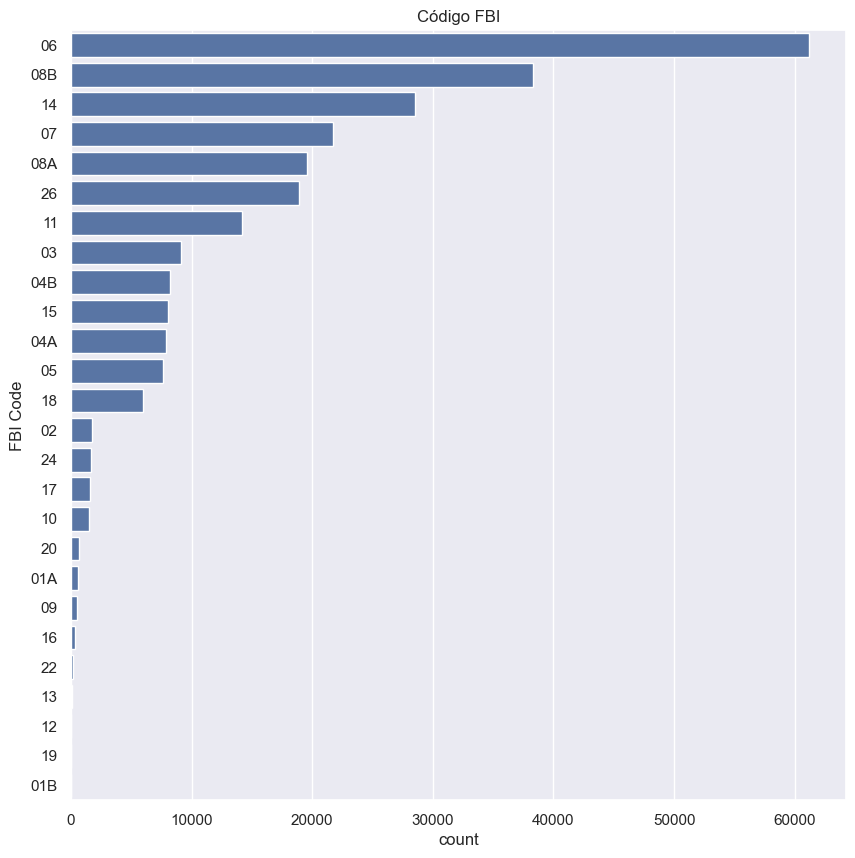

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# tipo de crimen
sns.countplot(data=df_csv, y='Primary Type', order=df_csv['Primary Type'].value_counts().index, ax=ax[0])
ax[0].set_title('Tipo de crimen')
# distrito
sns.countplot(data=df_csv, y='District', order=df_csv['District'].value_counts().index, ax=ax[1])
ax[1].set_title('Distrito')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
# códifo FBI
sns.countplot(data=df_csv, y='FBI Code', order=df_csv['FBI Code'].value_counts().index, ax=ax)
ax.set_title('Código FBI')
plt.show()


Análisis sobre el dato que nos llamó la atención, la hora 0 y hora 12

In [16]:

print(df_csv["Date"].dt.date.value_counts())

print(df_csv["Date"].dt.time.value_counts())



Date
2024-01-01    981
2024-09-01    906
2024-07-05    875
2024-11-01    870
2024-06-01    863
             ... 
2024-12-25    503
2024-01-15    496
2024-01-16    489
2024-11-28    416
2024-01-14    399
Name: count, Length: 366, dtype: int64
Date
00:00:00    8935
12:00:00    5975
18:00:00    4324
09:00:00    4321
17:00:00    4242
            ... 
06:32:00      16
05:51:00      15
06:31:00      14
06:29:00      14
16:38:18       1
Name: count, Length: 1441, dtype: int64
